# Need to learn before interview
1. dataframe indexing and slicing
2. why do you use gradient decent not minmax scaler after training
3. fit() hyperplane 40.07
4. coff and intercept importance.
5. get_params importance
6. why we need adjusted r-square

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error,mean_absolute_error,r2_score)

In [5]:
df = pd.read_csv("C:\CU MCA\SEMESTER - 2\ML\My projects\HousingData.csv")

In [6]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Preparing the dataset

Data inspection

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [10]:
df.shape

(506, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
## summarizing the stats of dataset
df.describe()# this is only for numerical data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
# changing the datatype from int to float of RAD and TAX
# back up the dataset because if type custing occures any loss of data so for safety purpose back up of data is necessary
df_copy = df.copy()

In [14]:
# Change data type of a specific column
df['RAD'] = df['RAD'].astype('float')
df['TAX'] = df['TAX'].astype('float')

In [15]:
# now all attributes are float type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [16]:
# examin the data affter type custing
# Check the data type of the column you want to convert
print(df['TAX'].dtype)

# Examine the unique values to understand the data
print(df['TAX'].unique())

float64
[296. 242. 222. 311. 307. 279. 252. 233. 243. 469. 226. 313. 256. 284.
 216. 337. 345. 305. 398. 281. 247. 270. 276. 384. 432. 188. 437. 403.
 193. 265. 255. 329. 402. 348. 224. 277. 300. 330. 315. 244. 264. 223.
 254. 198. 285. 241. 293. 245. 289. 358. 304. 287. 430. 422. 370. 352.
 351. 280. 335. 411. 187. 334. 666. 711. 391. 273.]


Whenever I get the dataset, I will check the null value - for that I will do isnull()

 if the values are NA.
NA values, such as None or numpy.NaN, gets mapped to True
values.
Everything else gets mapped to False values. Characters such as empty
strings '' or numpy.inf are not considered NA values

In [17]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df.isna() #pandas method

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
np.isnan(df) #numpy method 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


see in pandas isnull() and isna() and in numpy bp.isnan(df) are doing same job, it checks missing values
But the problem is all value can not be manually checked so we will use the agreegate function sum()



In [20]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [21]:
# to handle missing value we just delete all those rows which contain any NA value in any cell
df = df.dropna(axis=0) #for dropna() axis=0 by default

In [22]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [23]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Exploritory data analysis

In [24]:
# checking the correlation
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


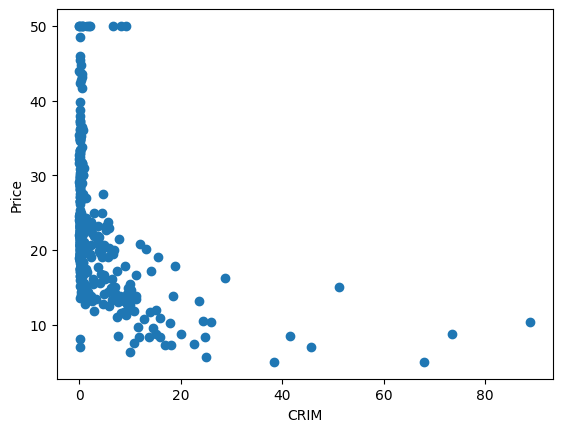

In [25]:

plt.scatter(df['CRIM'],df['MEDV'])
plt.xlabel("CRIM")
plt.ylabel("Price")
plt.show()


CRIM and MEDV(peice) are negetively correlated means those place where crime rate is high there price definately will be low. as we can see it is not linearly dependent but inversely correlated

In [26]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\souri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


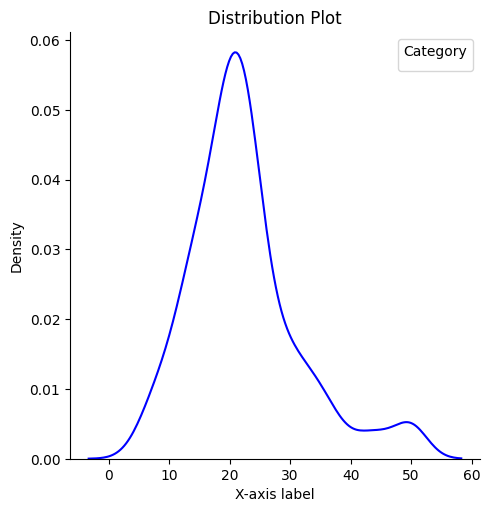

In [27]:
import seaborn as sns


# Assuming you have a dataset named 'data' and a categorical variable named 'category'
sns.displot(data=df, x='MEDV',kind='kde', color='blue')
plt.title('Distribution Plot')
plt.xlabel('X-axis label')
plt.ylabel('Density')
plt.legend(title='Category')
plt.show()

In [28]:
# independent features in X and target attr in y
# X = df.iloc[:,:df.shape[1]-1]
# y = df.iloc[:,df.shape[1]-1:df.shape[1]+1]
X = df.iloc[:,:-1] #all independent variable
y = pd.DataFrame(df.iloc[:,-1]) #the target variable
print(X.columns)
print(y.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Index(['MEDV'], dtype='object')


In [29]:
# train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(275+119)
print(394/500)

(275, 13)
(119, 13)
394
0.788


In [31]:
# standadizing the dataset
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

# Model training

In [32]:
model = LinearRegression().fit(x_train,y_train)

In [33]:
print(model.coef_)

[[-1.16422484  1.06108499  0.39032387  0.29209079 -1.99660097  2.919107
  -0.56678274 -2.98589329  2.41887408 -2.87948075 -1.92242361  0.87551786
  -2.71551439]]


In [34]:
print(model.intercept_)

[21.87236364]


In [35]:
print(model.get_params)

<bound method BaseEstimator.get_params of LinearRegression()>


prediction on x_test

In [36]:
y_pred = model.predict(x_test)

prediction visualizing

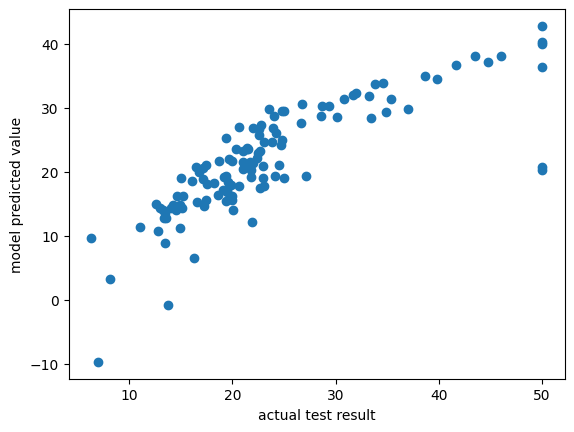

In [37]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual test result")
plt.ylabel("model predicted value")
plt.show()

Observation -  y_test and y_pred are linearly related so our model is good

In [38]:
mean_squared_error(y_test,y_pred)

33.91693453444477

R-square and adjusted R-square
1-(SSR/SST) SSR : sum of square of resudials(|y_test-y_pred|)
SST : Total Sum Of Square

In [39]:
print(r2_score(y_test,y_pred))

0.6364248546526884


# New Data Prediction

Pickling the model means convert model into the pickle file

In [43]:

filename = 'model.pkl'

In [44]:
pickle.dump(model,open(filename,'wb'))

In [46]:
#unpickling 
pickled_model = pickle.load(open('model.pkl','rb'))

In [47]:
pickled_model

LinearRegression()